<a href="https://colab.research.google.com/github/thisisanuragn/ANURAG-N/blob/main/AnuragN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/HR-Employee-Attrition-All.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# **Exploratory Data Analysis**

**DISTRIBUTION OF AGE IN ATTRITION**

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


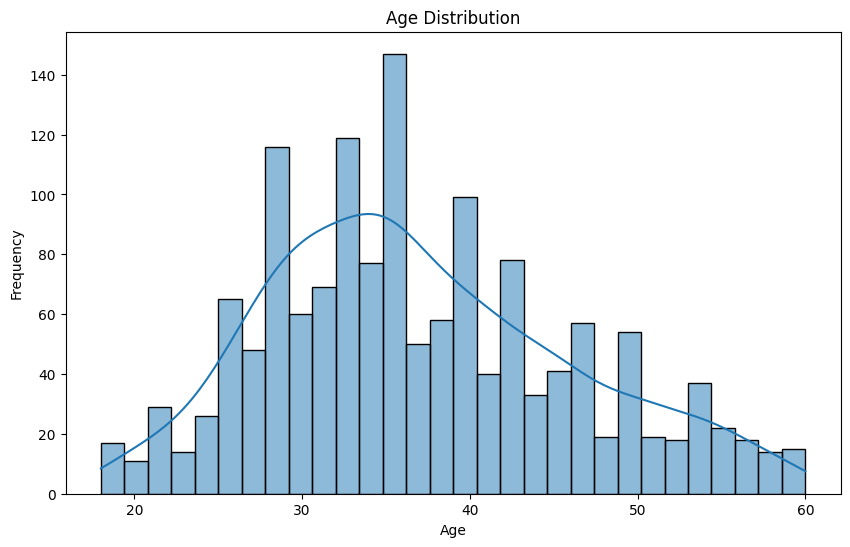

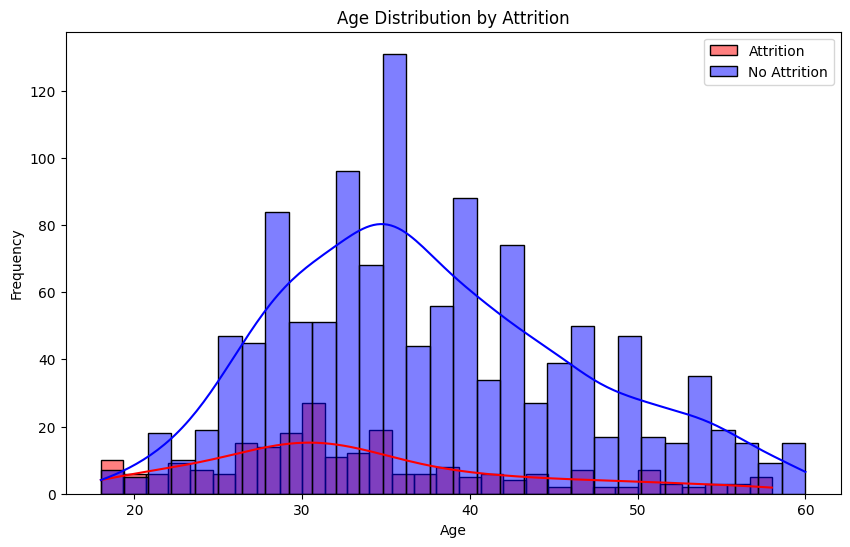

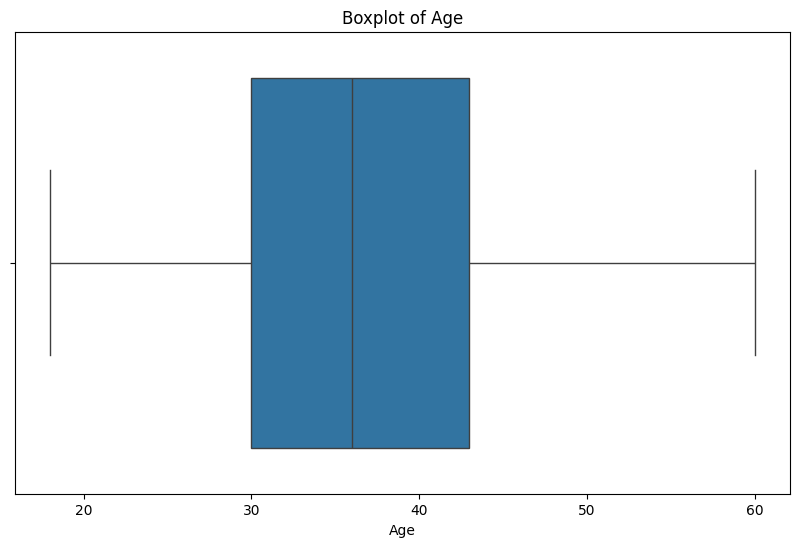

In [ ]:
 # Descriptive statistics for 'Age'
print(data['Age'].describe())

# Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Age' by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Attrition'] == 'Yes']['Age'], kde=True, color='red', bins=30, label='Attrition')
sns.histplot(data[data['Attrition'] == 'No']['Age'], kde=True, color='blue', bins=30, label='No Attrition')
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()




**DISTRIBUTION OF BUSINESS TRAVEL IN ATTRITION**

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569


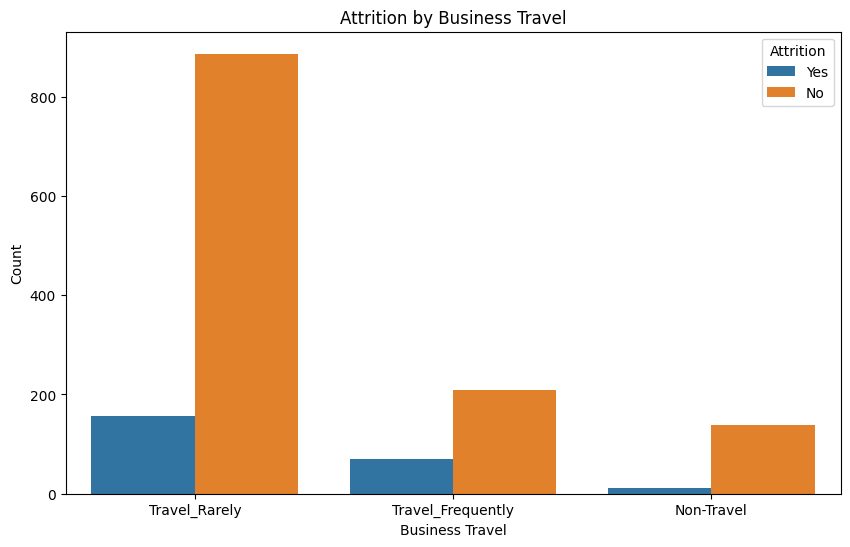

In [ ]:
# Frequency analysis for 'BusinessTravel'
print(data['BusinessTravel'].value_counts())

# Attrition Analysis for 'BusinessTravel'
business_travel_attrition = data.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack()
print(business_travel_attrition)

# Visualize Attrition by Business Travel
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='BusinessTravel', hue='Attrition')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()



**DISTRIBUTION OF DAILYRATE IN ATTRITION**

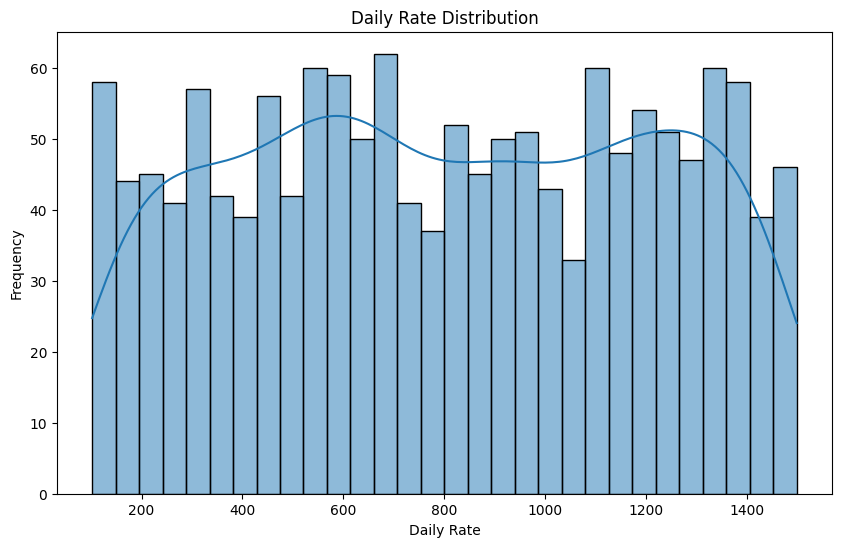

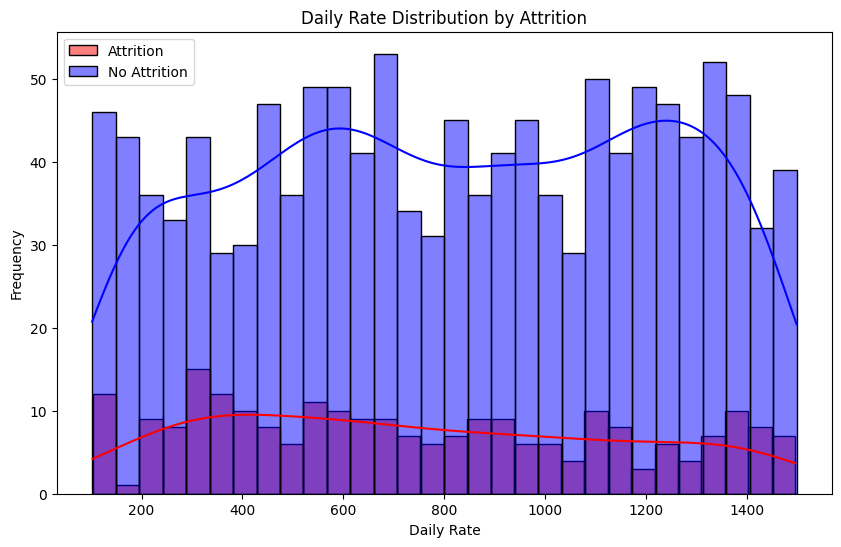

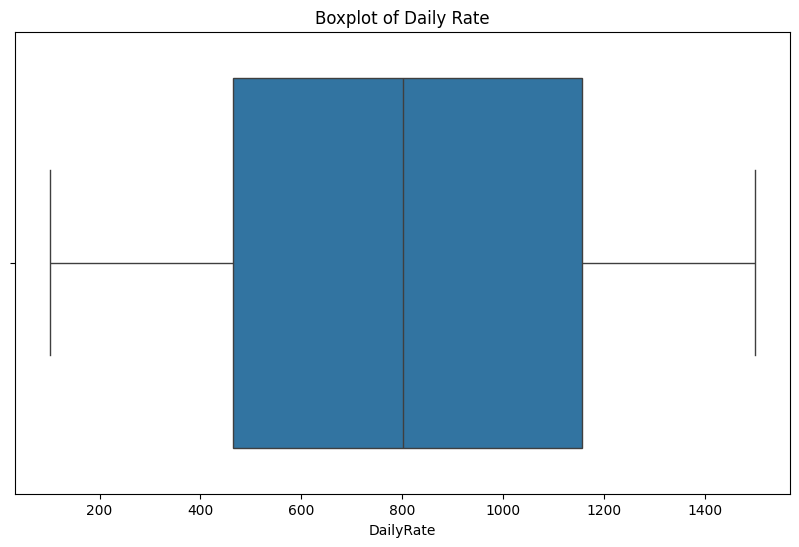

In [ ]:
# Distribution of 'DailyRate'
plt.figure(figsize=(10, 6))
sns.histplot(data['DailyRate'], kde=True, bins=30)
plt.title('Daily Rate Distribution')
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'DailyRate' by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Attrition'] == 'Yes']['DailyRate'], kde=True, color='red', bins=30, label='Attrition')
sns.histplot(data[data['Attrition'] == 'No']['DailyRate'], kde=True, color='blue', bins=30, label='No Attrition')
plt.title('Daily Rate Distribution by Attrition')
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['DailyRate'])
plt.title('Boxplot of Daily Rate')
plt.show()


**DISTRIBUTION OF DEPARTMENT IN ATTRITION**

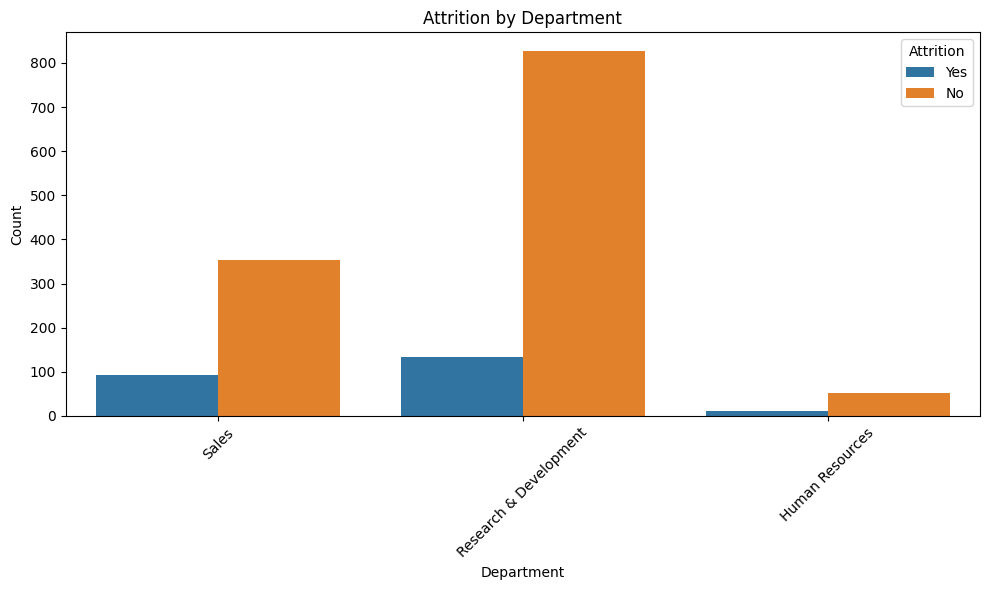

In [ ]:
#Distribution of department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

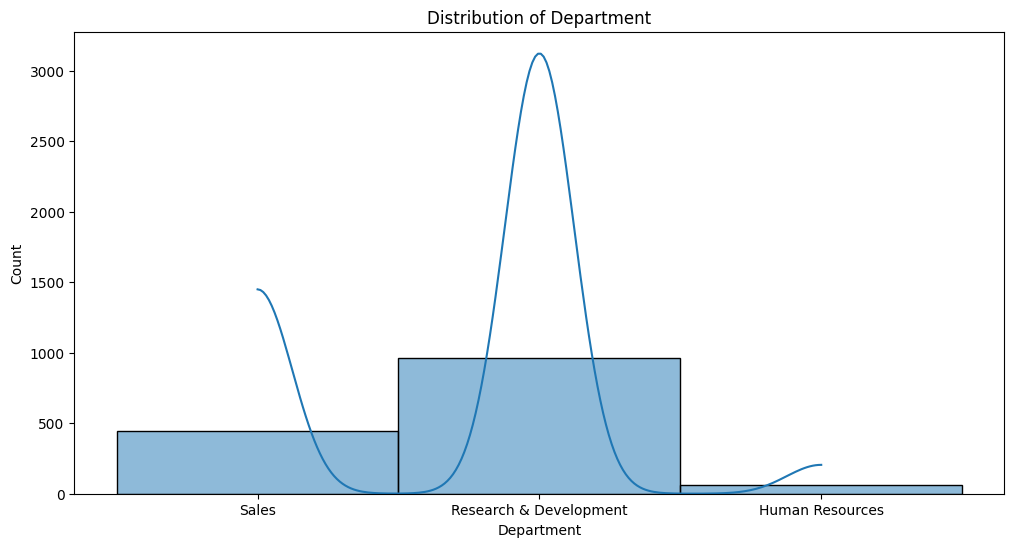

In [ ]:
# Summary statistics
print(data.describe())

# Histogram of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(data['Department'], bins=30, kde=True)
plt.title('Distribution of Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


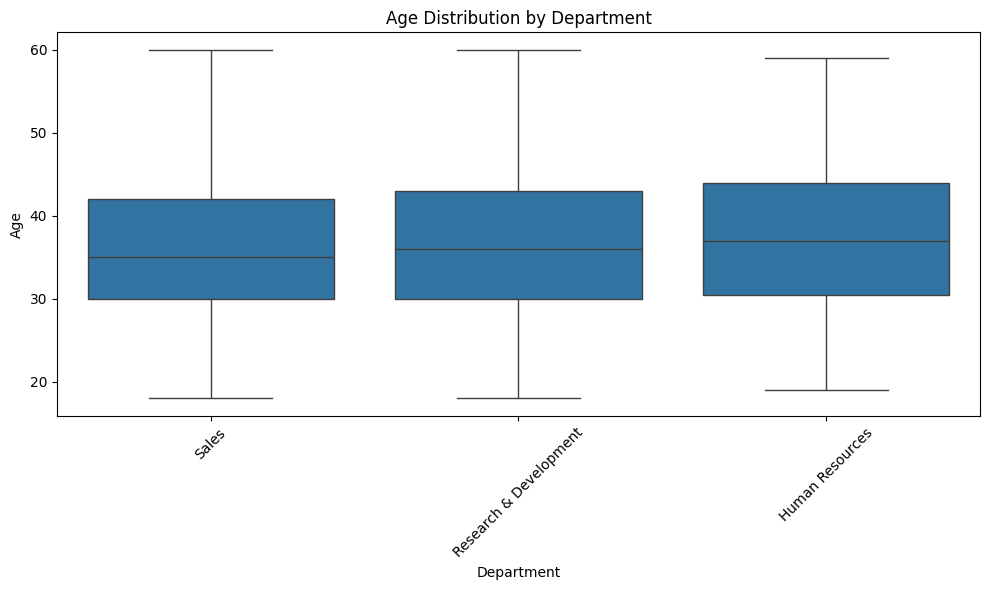

In [ ]:
# Boxplot of age by department
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Age', data=data)
plt.title('Age Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**DISTRIBUTION OF DISTANCE FROM HOME IN ATTRITION**

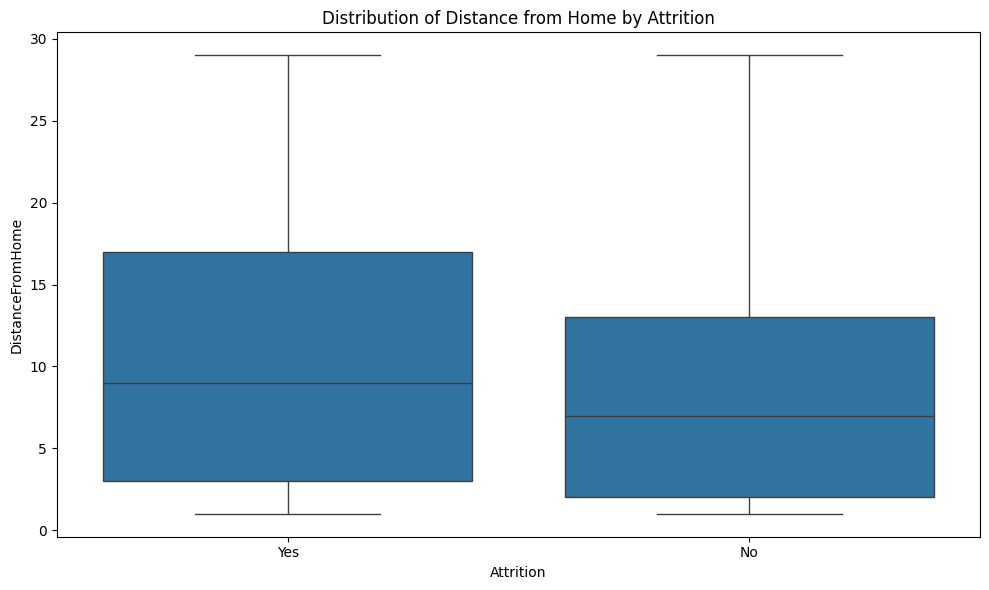

In [ ]:
#Distribution by distance from home
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=data)
plt.title('Distribution of Distance from Home by Attrition')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.tight_layout()
plt.show()


count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


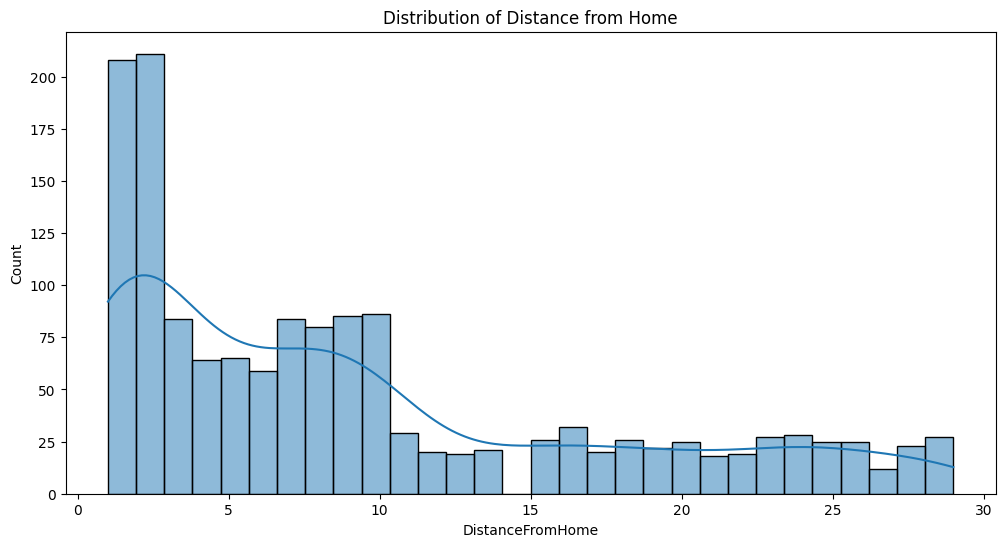

In [ ]:
# Summary statistics
print(data['DistanceFromHome'].describe())

# Histogram of distance from home
plt.figure(figsize=(12, 6))
sns.histplot(data['DistanceFromHome'], bins=30, kde=True)
plt.title('Distribution of Distance from Home')
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.show()


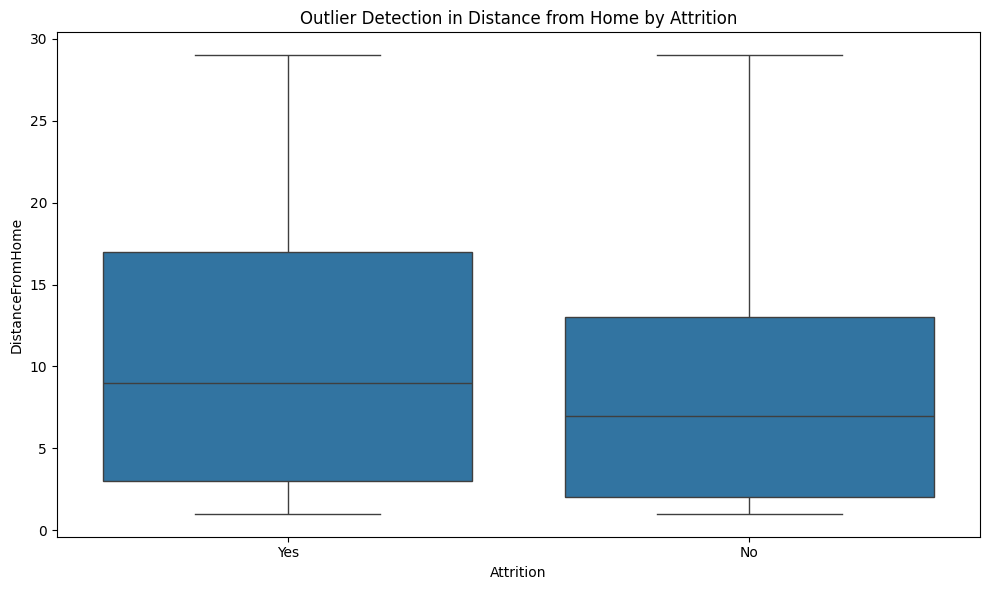

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=data)
plt.title('Outlier Detection in Distance from Home by Attrition')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.tight_layout()
plt.show()


**DISTRIBUTION OF EDUCATION IN ATTRITION**

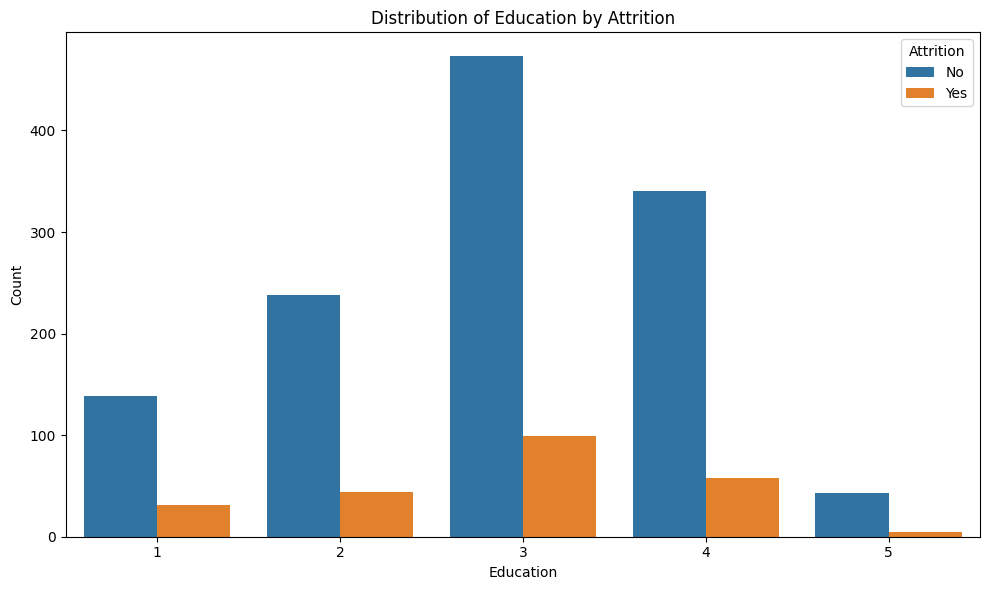

In [ ]:
#Distribution of Education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=data)
plt.title('Distribution of Education by Attrition')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()


               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

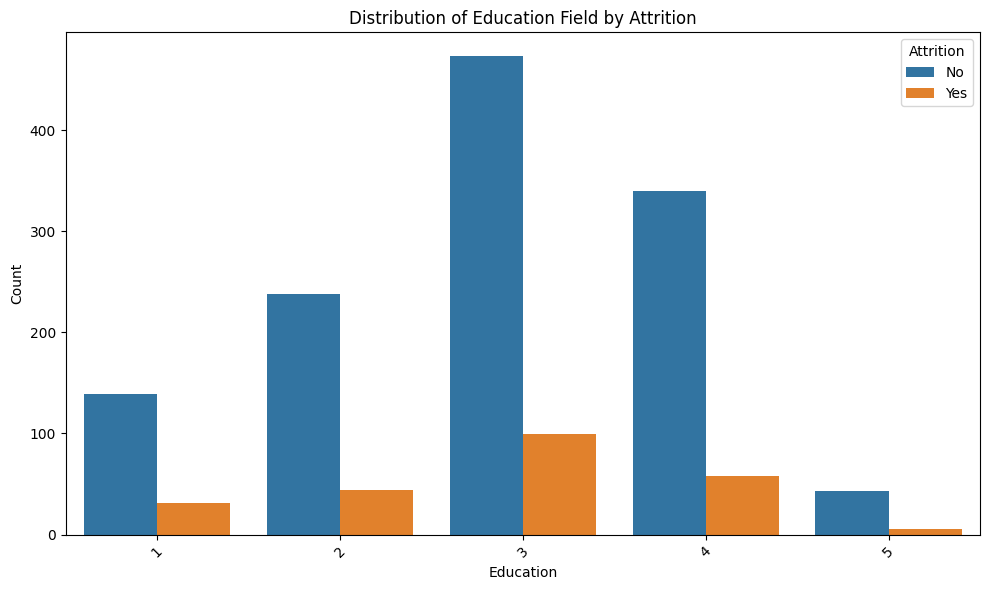

In [ ]:
# Summary statistics for the whole dataset
print(data.describe())

# Countplot of education field
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=data)
plt.title('Distribution of Education Field by Attrition')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**DISTRIBUTION OF EDUCATIONALFIELD IN ATTRITION**

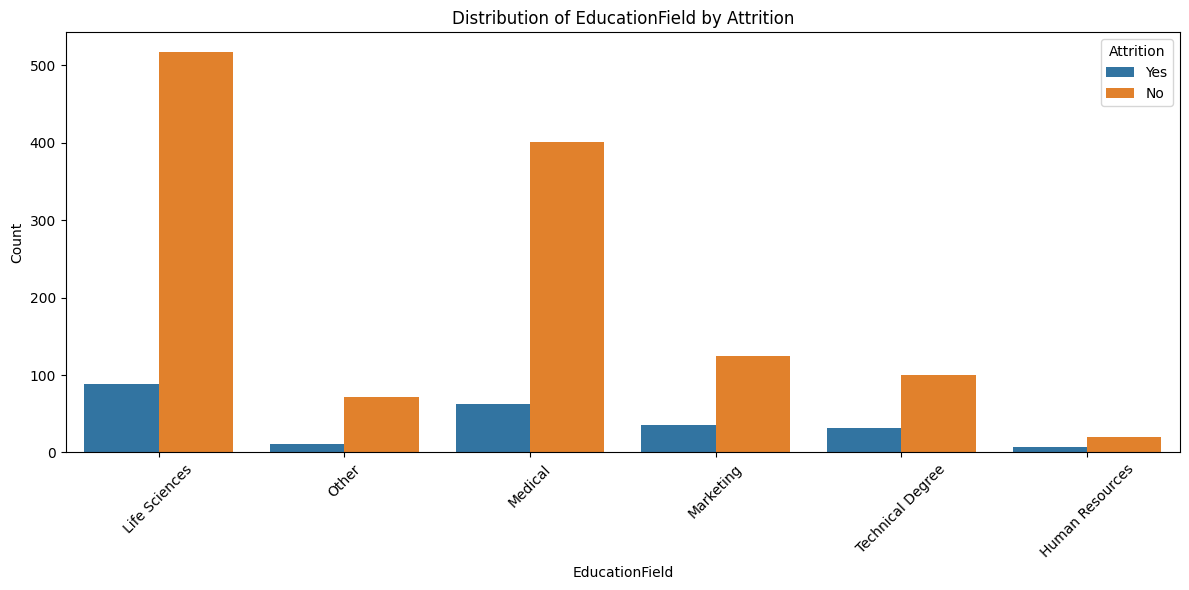

In [ ]:
#Distribution of Educational Field
plt.figure(figsize=(12, 6))
sns.countplot(x='EducationField', hue='Attrition', data=data)
plt.title('Distribution of EducationField by Attrition')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()


count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object


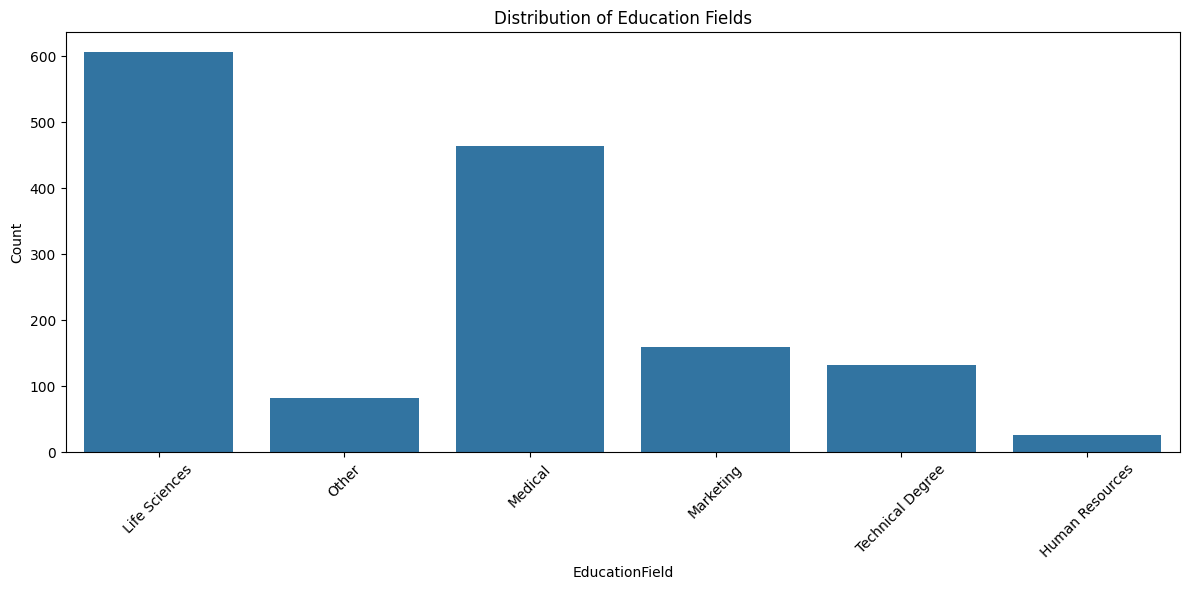

In [ ]:
# Summary statistics for education field
print(data['EducationField'].describe())

# Count plot for education fields
plt.figure(figsize=(12, 6))
sns.countplot(x='EducationField', data=data)
plt.title('Distribution of Education Fields')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


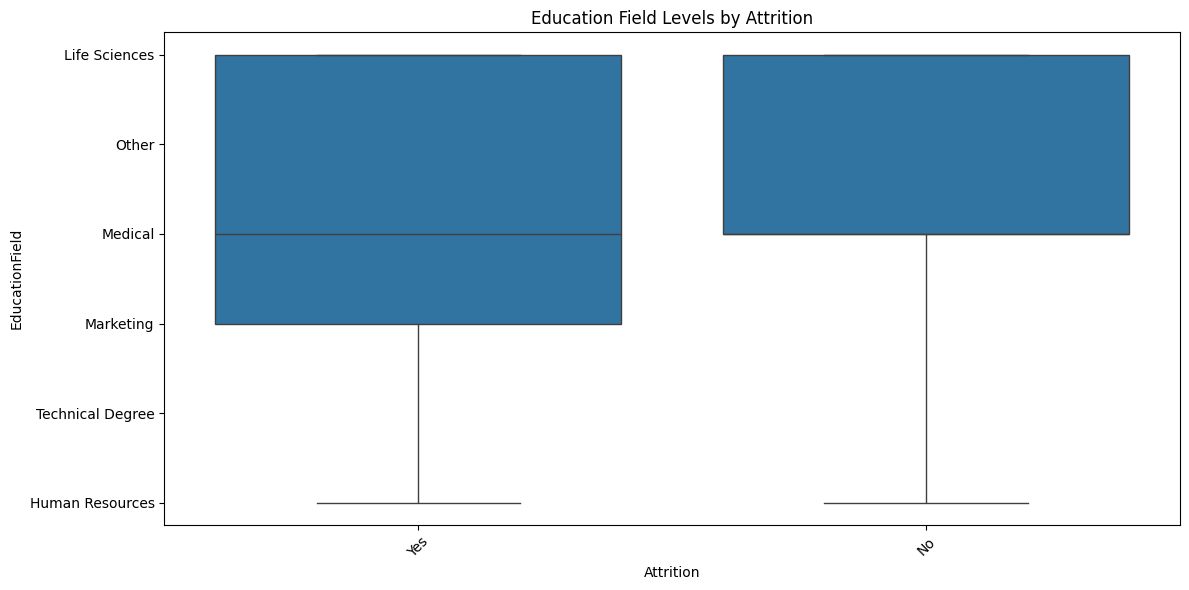

In [ ]:
# Boxplot to detect any anomalies in education field distribution by attrition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='EducationField', data=data)
plt.title('Education Field Levels by Attrition')
plt.xlabel('Attrition')
plt.ylabel('EducationField')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
